# Machine Learning para descobrir transações fraudulentas
    Uma análise de dados exploratória e Machine Learning feito a partir de dados sintéticos de transações contendo fraudes para prever futuras transações fraudulentas.

## Importar bibliotecas a serem usadas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

## Carregar arquivo com os dados

In [2]:
data = pd.read_csv('./PS_20174392719_1491204439457_log.csv')

## Exploração dos dados

In [3]:
# Verificar as colunas e tipos de dados
data_info = data.info()

# Estatísticas descritivas
data_describe = data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## Análise de dados exploratória

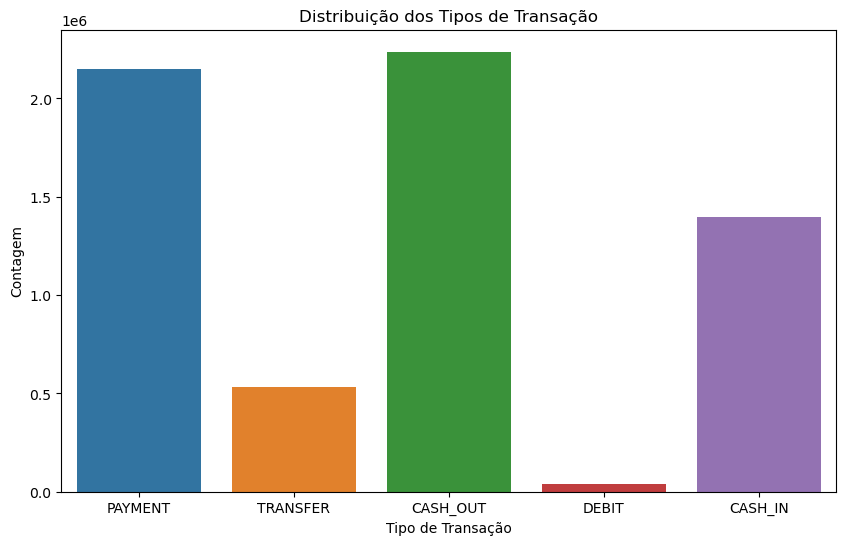

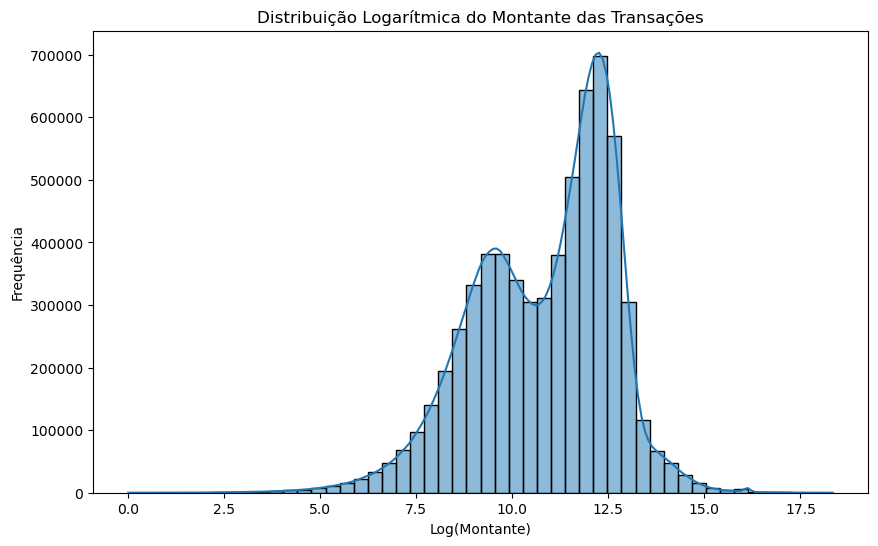

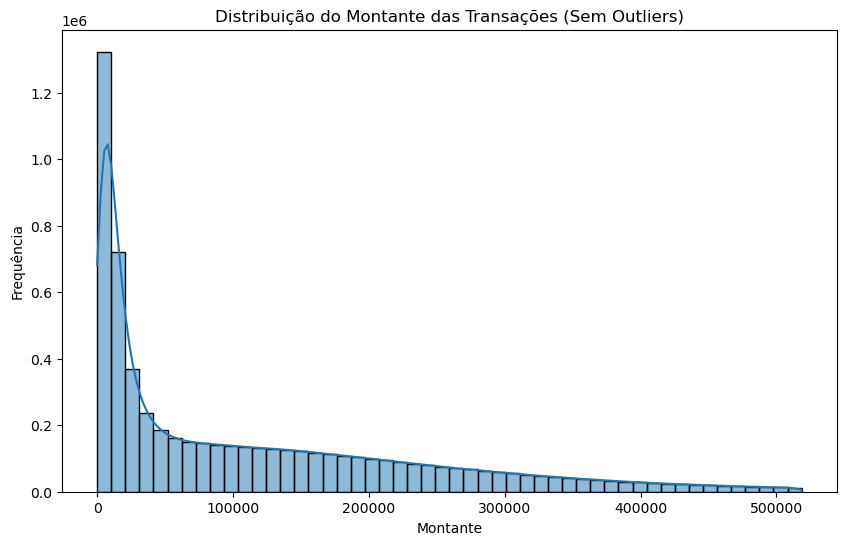

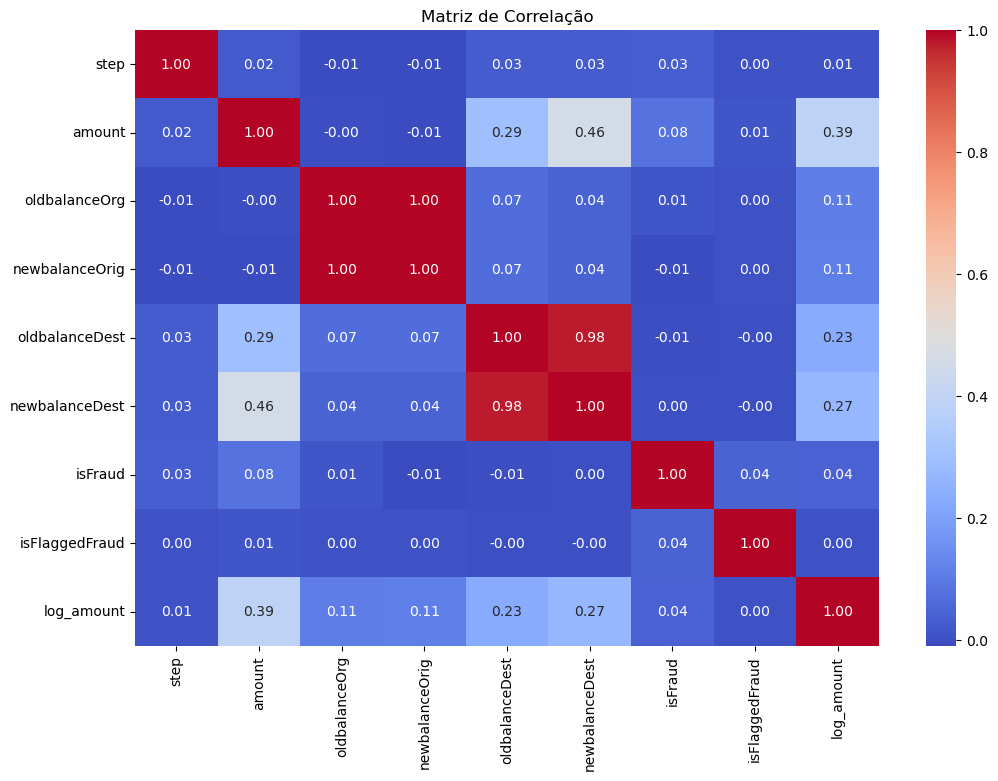

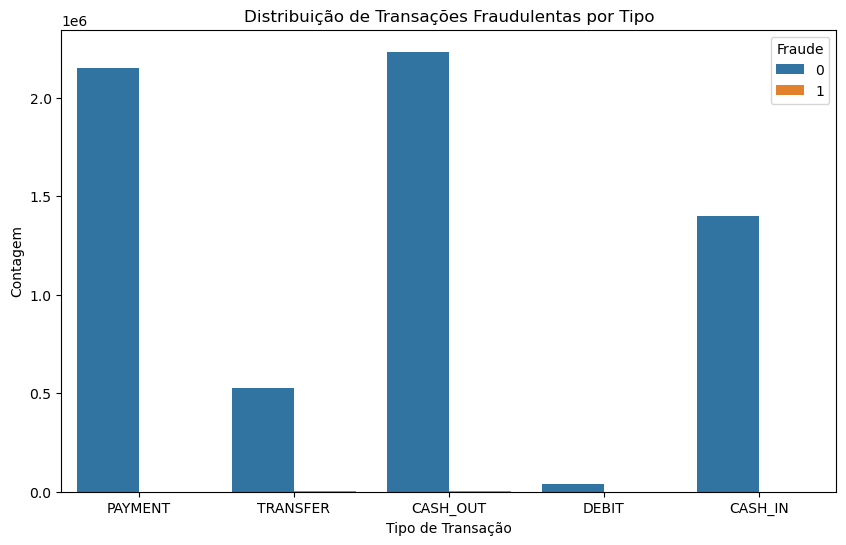

In [4]:
# Distribuição do tipo de transação
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='type')
plt.title('Distribuição dos Tipos de Transação')
plt.xlabel('Tipo de Transação')
plt.ylabel('Contagem')
plt.show()

# Aplicar transformação logarítmica ao montante das transações
data['log_amount'] = data['amount'].apply(lambda x: np.log1p(x))

# Histograma do montante das transações após transformação logarítmica
plt.figure(figsize=(10, 6))
sns.histplot(data['log_amount'], bins=50, kde=True)
plt.title('Distribuição Logarítmica do Montante das Transações')
plt.xlabel('Log(Montante)')
plt.ylabel('Frequência')
plt.show()

# Filtragem de outliers (considerando valores abaixo do percentil 95)
threshold = data['amount'].quantile(0.95)
filtered_data = data[data['amount'] < threshold]

# Histograma do montante das transações filtrando os outliers
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['amount'], bins=50, kde=True)
plt.title('Distribuição do Montante das Transações (Sem Outliers)')
plt.xlabel('Montante')
plt.ylabel('Frequência')
plt.show()

# Matriz de correlação
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

# Distribuição de transações fraudulentas por tipo
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='type', hue='isFraud')
plt.title('Distribuição de Transações Fraudulentas por Tipo')
plt.xlabel('Tipo de Transação')
plt.ylabel('Contagem')
plt.legend(title='Fraude')
plt.show()

## Previsão de transações fraudulentas utilizando Machine Learning

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.98      0.78      0.87      2464

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



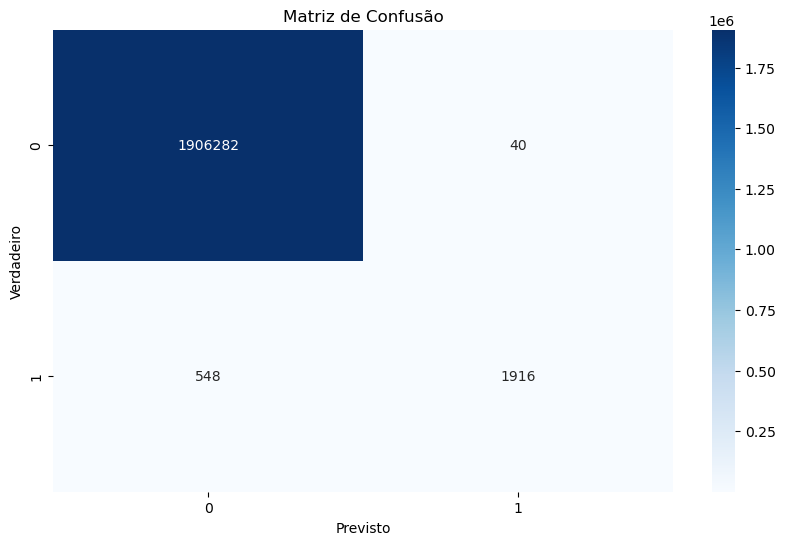

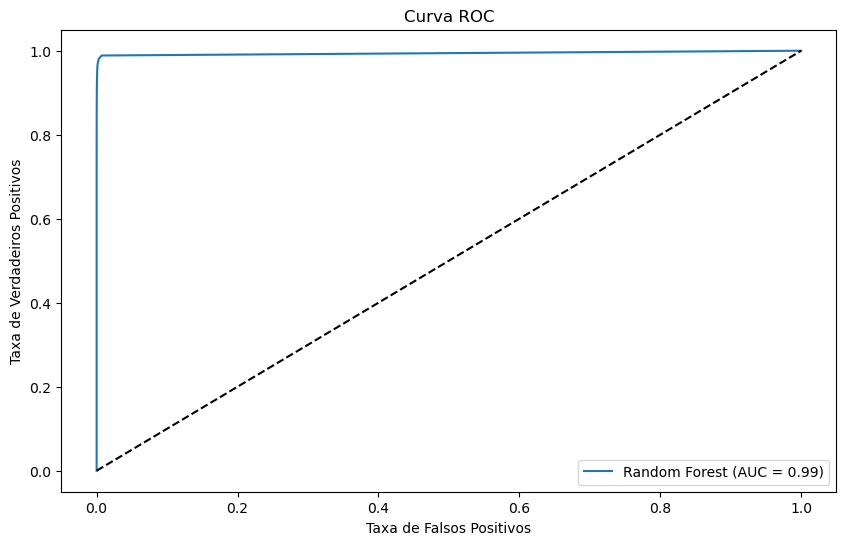

In [5]:
# Codificação de variáveis categóricas
data = pd.get_dummies(data, columns=['type'], drop_first=True)

# Selecionar as features e o target
X = data.drop(['isFraud', 'nameOrig', 'nameDest', 'amount'], axis=1)
y = data['isFraud']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Treinamento do modelo
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliação do modelo
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

# Curva ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc='lower right')
plt.show()